(7043, 21)


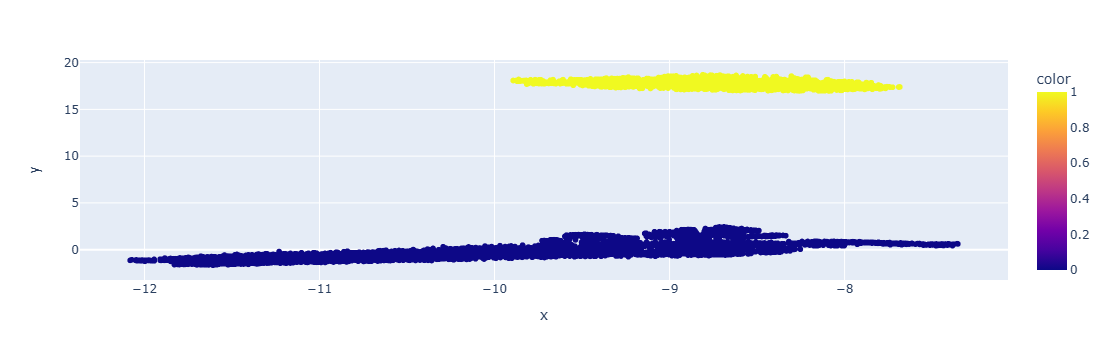

In [6]:
# !pip install umap-learn

import umap
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from plotly import express as px

# For save PNG image you need:
#pip install -U kaleido

# Manual settings:

target = 'Churn'

n_components = 4 # Default 2
n_neighbors = 200 # Default 15
min_dist = 0.1 # Default 0.1

isMinMaxScaler = True # True - MinMaxScaler, False - StandardScaler

#

reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist) #, random_state=1) ← "Use no seed for parallelism"

df = pd.read_csv(r'.\0.Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)

# Automatic LabelEncode all non numerical features:

categorical_cols = df.select_dtypes(['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
#print(df.head())

# Normalization

X, y = df.drop(target, axis=1), df[target]

if isMinMaxScaler:
    X = MinMaxScaler().fit_transform(X)
else:
    X = StandardScaler().fit_transform(X)

# Processing

embedding = reducer.fit_transform(X, y)

# Visualization

fig = px.scatter(
    x=embedding[:, 0],
    y=embedding[:, 1],
    color=y.astype(int)
)

fig.show()

# Save the figure to a PNG file
fig.write_image("UMAP.png", format="png", width=900, height=600)
# For save PNG image you need:
#pip install -U kaleido
